# La poule qui chante 
## Produisez une étude de marché avec Python 


Ce notebook vise à explorer les bases de données 'df_poulet', 'pib_2017' et 'pop_2017', qui comprennent différents types de variables. Elles fournissent des informations économiques, démographiques et commerciales sur le commerce de la viande de volaille en 2017, collectées auprès des États et des organisations internationales.

Après avoir effectué **AED - Analyse Exploratoire des données**, nous produirons un DataFrame qui contiendra :

Les individus en lignes 'Zone' : Le nom unique de chaque pays. Les colonnes suivantes : Importations - Quantité, Disponibilité intérieure, Disponibilité alimentaire en quantité (kg/personne/an), Évolution de la population en 2017 %, PIB/Habitant, Exportations - Quantité, Pop_réelle, Consommation moyenne par (kg/personne/an). Ensuite, **Normalisation du DataFrame**, puis observation et création de colonnes synthétiques (indicateurs) pour réduire la dimension de nos données et permettre une meilleur compréhension. Pour finir, **Analyse en PCA et export pour le clustering** dans un second notebook.

# Partie 1 : Importations des données

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn import datasets

In [3]:
dispo_ali=pd.read_csv("C:\p9\DisponibiliteAlimentaire_2017.csv")
dispo_ali.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [4]:
#Importation des données
pop_2000_2018=pd.read_excel("C:\p9\Population_2000_2018.xlsx")
pop_2000_2018

,Zone,Année,Pop_milliers
0,Afghanistan,2000,20779.953
1,Afghanistan,2001,21606.988
2,Afghanistan,2002,22600.770
3,Afghanistan,2003,23680.871
4,Afghanistan,2004,24726.684
...,...,...,...
4406,Zimbabwe,2014,13586.707
4407,Zimbabwe,2015,13814.629
4408,Zimbabwe,2016,14030.331
4409,Zimbabwe,2017,14236.595


In [5]:
pib_2017 = pd.read_csv("C:\p9\pib.csv")
pib_2017.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,55088.6,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2096.1,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,13950.5,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,8,Albanie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,12771.0,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,12,Algérie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,11809.5,X,Ciffre de sources internationales,NaN


# Partie 2 : Nettoyage et exploration


## A. Préparation du fichier disponibilité alimentaire

In [6]:
dispo_ali.isnull().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

In [7]:
dispo_ali.shape

(176600, 14)

In [8]:
#Vérifier les colonnes identiques dans dispo_ali
if dispo_ali['Code année'].equals(dispo_ali['Année']):
    print("Les colonnes 'Code année' et 'Année' sont identiques.")
else:
    print("Les colonnes 'code' et 'Année' ne sont pas identiques.")


Les colonnes 'Code année' et 'Année' sont identiques.


In [9]:
# Convertir les Milliers de tonnes en kg
dispo_ali.loc[dispo_ali['Unité'] == 'Milliers de tonnes', 'Valeur'] = dispo_ali.loc[dispo_ali['Unité'] == 'Milliers de tonnes', 'Valeur'] * 1000000

# Convertir les tonnes en kg
dispo_ali.loc[dispo_ali['Unité'] == 'Tonnes', 'Valeur'] = dispo_ali.loc[dispo_ali['Unité'] == 'Tonnes', 'Valeur'] * 1000

# Assurer que toutes les unités sont maintenant en kg
dispo_ali['Unité'] = 'kg'
dispo_ali.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,kg,4.281000e+09,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,kg,2.302000e+09,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,kg,-1.190000e+08,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,kg,0.000000e+00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,kg,6.701000e+09,S,Données standardisées


In [10]:
#dispo_ali filtre sur Viande volaille
dispo_ali_poulet = dispo_ali[dispo_ali['Produit'] == 'Viande de Volailles']


In [11]:
dispo_ali_poulet.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,kg,28000000.0,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,kg,29000000.0,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,kg,0.0,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,kg,57000000.0,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,kg,2000000.0,S,Données standardisées


In [12]:
#Supprimer les colonnes inutiles à l'analyse 
colonnes_a_supprimer = ["Code Domaine","Domaine","Code zone", "Code Élément", "Code Produit",'Code année',"Symbole","Description du Symbole"]
dispo_ali_poulet = dispo_ali_poulet.drop(colonnes_a_supprimer, axis=1)

dispo_ali_poulet.head()

,Zone,Élément,Produit,Année,Unité,Valeur
651,Afghanistan,Production,Viande de Volailles,2017,kg,28000000.0
652,Afghanistan,Importations - Quantité,Viande de Volailles,2017,kg,29000000.0
653,Afghanistan,Variation de stock,Viande de Volailles,2017,kg,0.0
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,2017,kg,57000000.0
655,Afghanistan,Pertes,Viande de Volailles,2017,kg,2000000.0


In [13]:
# Utiliser la méthode pivot_table pour pivoter la table
dispo_ali_poulet_pivot = pd.pivot_table(dispo_ali_poulet, values='Valeur', index=['Zone'], columns='Élément')
# Afficher le résultat
dispo_ali_poulet_pivot.head()

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,5.700000e+07,NaN,29000000.0,5.500000e+07,2000000.0,2.800000e+07,0.0,NaN,NaN,0.0
Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2.118000e+09,63000000.0,514000000.0,2.035000e+09,83000000.0,1.667000e+09,0.0,NaN,NaN,0.0
Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,4.700000e+07,0.0,38000000.0,4.700000e+07,NaN,1.300000e+07,0.0,NaN,NaN,4000000.0
Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,2.770000e+08,0.0,2000000.0,2.640000e+08,13000000.0,2.750000e+08,0.0,NaN,NaN,0.0
Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1.739000e+09,646000000.0,842000000.0,1.609000e+09,NaN,1.514000e+09,-38000000.0,NaN,167000000.0,-29000000.0


In [14]:
# Colonnes spécifiques à garder
colonnes_specifiques = ['Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité']

# Ajouter les colonnes spécifiques à dispo_ali_poulet
df_dispo_ali_poulet = pd.merge(dispo_ali_poulet, dispo_ali_poulet_pivot[colonnes_specifiques], left_on='Zone', right_index=True)

# Afficher le DataFrame résultant
df_dispo_ali_poulet

,Zone,Élément,Produit,Année,Unité,Valeur,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité
651,Afghanistan,Production,Viande de Volailles,2017,kg,28000000.00,1.53,57000000.0,NaN,29000000.0
652,Afghanistan,Importations - Quantité,Viande de Volailles,2017,kg,29000000.00,1.53,57000000.0,NaN,29000000.0
653,Afghanistan,Variation de stock,Viande de Volailles,2017,kg,0.00,1.53,57000000.0,NaN,29000000.0
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,2017,kg,57000000.00,1.53,57000000.0,NaN,29000000.0
655,Afghanistan,Pertes,Viande de Volailles,2017,kg,2000000.00,1.53,57000000.0,NaN,29000000.0
...,...,...,...,...,...,...,...,...,...,...
176396,Zimbabwe,Nourriture,Viande de Volailles,2017,kg,67000000.00,4.68,76000000.0,NaN,6000000.0
176397,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,2017,kg,4.68,4.68,76000000.0,NaN,6000000.0
176398,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,2017,kg,16.00,4.68,76000000.0,NaN,6000000.0
176399,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,2017,kg,1.59,4.68,76000000.0,NaN,6000000.0


In [15]:
# Filtrer les lignes où la colonne 'Zone' contient au moins le mot "Chine"
df_dispo_ali_poulet.loc[df_dispo_ali_poulet['Zone'].str.contains('Chine', case=False), 'Zone'] = 'Chine'
df_dispo_ali_poulet


,Zone,Élément,Produit,Année,Unité,Valeur,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité
651,Afghanistan,Production,Viande de Volailles,2017,kg,28000000.00,1.53,57000000.0,NaN,29000000.0
652,Afghanistan,Importations - Quantité,Viande de Volailles,2017,kg,29000000.00,1.53,57000000.0,NaN,29000000.0
653,Afghanistan,Variation de stock,Viande de Volailles,2017,kg,0.00,1.53,57000000.0,NaN,29000000.0
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,2017,kg,57000000.00,1.53,57000000.0,NaN,29000000.0
655,Afghanistan,Pertes,Viande de Volailles,2017,kg,2000000.00,1.53,57000000.0,NaN,29000000.0
...,...,...,...,...,...,...,...,...,...,...
176396,Zimbabwe,Nourriture,Viande de Volailles,2017,kg,67000000.00,4.68,76000000.0,NaN,6000000.0
176397,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,2017,kg,4.68,4.68,76000000.0,NaN,6000000.0
176398,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,2017,kg,16.00,4.68,76000000.0,NaN,6000000.0
176399,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,2017,kg,1.59,4.68,76000000.0,NaN,6000000.0


In [16]:
# Supprimer la colonne "Élément"
df_dispo_ali_poulet = df_dispo_ali_poulet.drop(columns=['Élément','Produit','Année','Valeur','Unité'])

# Effectuer le groupby sur la colonne "Zone"
df_grouped = df_dispo_ali_poulet.groupby('Zone').sum()
df_grouped


,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité
Zone,,,,
Afghanistan,16.83,6.270000e+08,0.000000e+00,3.190000e+08
Afrique du Sud,463.97,2.753400e+10,8.190000e+08,6.682000e+09
Albanie,179.96,5.170000e+08,0.000000e+00,4.180000e+08
Algérie,82.94,3.601000e+09,0.000000e+00,2.600000e+07
Allemagne,233.64,2.086800e+10,7.752000e+09,1.010400e+10
...,...,...,...,...
Émirats arabes unis,478.17,4.532000e+09,1.034000e+09,4.763000e+09
Équateur,251.03,4.433000e+09,0.000000e+00,0.000000e+00
États-Unis d'Amérique,723.84,2.374580e+11,4.799600e+10,1.599000e+09


In [17]:
# Renommer le DataFrame groupé
dispo_poulet = df_grouped.rename(columns={'Valeur en kg': 'Valeur_totale_kg', 'Disponibilité alimentaire en quantité (kg/personne/an)': 'Disponibilite_kg_par_personne_an'})
dispo_poulet


,Disponibilite_kg_par_personne_an,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité
Zone,,,,
Afghanistan,16.83,6.270000e+08,0.000000e+00,3.190000e+08
Afrique du Sud,463.97,2.753400e+10,8.190000e+08,6.682000e+09
Albanie,179.96,5.170000e+08,0.000000e+00,4.180000e+08
Algérie,82.94,3.601000e+09,0.000000e+00,2.600000e+07
Allemagne,233.64,2.086800e+10,7.752000e+09,1.010400e+10
...,...,...,...,...
Émirats arabes unis,478.17,4.532000e+09,1.034000e+09,4.763000e+09
Équateur,251.03,4.433000e+09,0.000000e+00,0.000000e+00
États-Unis d'Amérique,723.84,2.374580e+11,4.799600e+10,1.599000e+09


In [18]:
dispo_poulet.isnull().sum()

Disponibilite_kg_par_personne_an    0
Disponibilité intérieure            0
Exportations - Quantité             0
Importations - Quantité             0
dtype: int64

In [19]:
dispo_poulet.shape

(169, 4)

## B. Nettoyage et exploration du fichier population

In [20]:
(pop_2000_2018.columns)

Index(['Zone', 'Année', 'Pop_milliers'], dtype='object')

In [21]:
pop_2000_2018.isnull().sum()

Zone            0
Année           0
Pop_milliers    0
dtype: int64

In [22]:
pop_2000_2018.shape

(4411, 3)

In [23]:
pop_2000_2018.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4406    False
4407    False
4408    False
4409    False
4410    False
Length: 4411, dtype: bool

In [24]:
# Extraire un df 2017
pop_2017 = pop_2000_2018.loc[pop_2000_2018['Année'] == 2017].copy()
pop_2017

,Zone,Année,Pop_milliers
17,Afghanistan,2017,36296.113
36,Afrique du Sud,2017,57009.756
55,Albanie,2017,2884.169
74,Algérie,2017,41389.189
93,Allemagne,2017,82658.409
...,...,...,...
4333,Venezuela (République bolivarienne du),2017,29402.484
4352,Viet Nam,2017,94600.648
4371,Yémen,2017,27834.819
4390,Zambie,2017,16853.599


In [25]:
# Supprimer la colonne 'Annee' du DataFrame pop_2017
pop_2017.drop('Année', axis=1, inplace=True)
pop_2017.sample(10)


,Zone,Pop_milliers
4409,Zimbabwe,14236.595
1591,Guinée-Bissau,1828.145
4219,Turkménistan,5757.667
55,Albanie,2884.169
454,Belize,375.769
1211,Eswatini,1124.805
3851,Sint Maarten (partie néerlandaise),41.444
131,Angola,29816.766
3428,République populaire démocratique de Corée,25429.825
1781,Îles Falkland (Malvinas),3.068


In [26]:
pop_2017['pop_milliers'] = pop_2017['Pop_milliers'] * 1000
pop_2017.head()

,Zone,Pop_milliers,pop_milliers
17,Afghanistan,36296.113,36296113.0
36,Afrique du Sud,57009.756,57009756.0
55,Albanie,2884.169,2884169.0
74,Algérie,41389.189,41389189.0
93,Allemagne,82658.409,82658409.0


In [27]:
pop_2017.drop('Pop_milliers', axis=1, inplace=True)
pop_2017.sample(10)


,Zone,pop_milliers
1800,Îles Féroé,48331.0
4143,Tokélaou,1300.0
1895,Îles Vierges américaines,104751.0
2199,Kirghizistan,6189733.0
4352,Viet Nam,94600648.0
1496,Guadeloupe,399672.0
652,Burkina Faso,19193234.0
3219,Polynésie française,276102.0
1629,Guyane française,275191.0
728,Cameroun,24566073.0


In [28]:
pop_2017.shape

(236, 2)

In [29]:
#Calculer l'évolution de la population 
pop_2016 = pop_2000_2018[pop_2000_2018['Année'] == 2016].set_index('Zone')['Pop_milliers']
pop_2017 = pop_2000_2018[pop_2000_2018['Année'] == 2017].set_index('Zone')['Pop_milliers']

In [30]:
evo_pop_2017= (pop_2017 - pop_2016) / pop_2016 * 100

In [31]:
evolution_df= evo_pop_2017.to_frame(name='Evolution population 2017 %').reset_index()

In [32]:
pop_2017 = pd.merge(pop_2017, evolution_df, on='Zone', how='left')
pop_2017 = pop_2017.rename(columns={'Pop_milliers': 'pop_réelle'})

# Afficher le DataFrame mis à jour
pop_2017

,Zone,pop_réelle,Evolution population 2017 %
0,Afghanistan,36296.113,2.580562
1,Afrique du Sud,57009.756,1.427048
2,Albanie,2884.169,-0.078609
3,Algérie,41389.189,2.066013
4,Allemagne,82658.409,0.565300
...,...,...,...
231,Venezuela (République bolivarienne du),29402.484,-1.503357
232,Viet Nam,94600.648,1.025440
233,Yémen,27834.819,2.453644
234,Zambie,16853.599,2.995339


In [33]:
# Filtrer les lignes où la colonne 'Zone' contient au moins le mot "Chine"
china_data_pop_2017 = pop_2017[pop_2017['Zone'].str.contains('Chine', case=False)]
china_data_pop_2017


,Zone,pop_réelle,Evolution population 2017 %
41,Chine - RAS de Hong-Kong,7306.322,0.866703
42,Chine - RAS de Macao,622.585,1.590801
43,"Chine, continentale",1421021.791,0.493083
44,"Chine, Taiwan Province de",23674.546,0.238570


In [34]:
# Convertir le nom des zones contenant "Chine" en "Chine"
pop_2017['Zone'] = pop_2017['Zone'].replace({'Chine, continentale': 'Chine', 'Chine - RAS de Hong-Kong': 'Chine', 'Chine - RAS de Macao': 'Chine', 'Chine, Taiwan Province de': 'Chine'})
pop_2017 = pop_2017.groupby('Zone').sum()
pop_2017= pop_2017.reset_index()
pop_2017


,Zone,pop_réelle,Evolution population 2017 %
0,Afghanistan,36296.113,2.580562
1,Afrique du Sud,57009.756,1.427048
2,Albanie,2884.169,-0.078609
3,Algérie,41389.189,2.066013
4,Allemagne,82658.409,0.565300
...,...,...,...
228,Îles Salomon,636.039,2.680010
229,Îles Turques-et-Caïques,37.115,1.520829
230,Îles Vierges américaines,104.751,-0.080126
231,Îles Vierges britanniques,29.577,0.756260


In [35]:
china_data_pop_2017 = pop_2017[pop_2017['Zone'] == 'Chine']
china_data_pop_2017

,Zone,pop_réelle,Evolution population 2017 %
41,Chine,1452625.244,3.189157


In [36]:
pop_2017

,Zone,pop_réelle,Evolution population 2017 %
0,Afghanistan,36296.113,2.580562
1,Afrique du Sud,57009.756,1.427048
2,Albanie,2884.169,-0.078609
3,Algérie,41389.189,2.066013
4,Allemagne,82658.409,0.565300
...,...,...,...
228,Îles Salomon,636.039,2.680010
229,Îles Turques-et-Caïques,37.115,1.520829
230,Îles Vierges américaines,104.751,-0.080126
231,Îles Vierges britanniques,29.577,0.756260


## C. Exploration et préparation du Fichier PIB

In [38]:
pib_2017.isnull().sum()

Code Domaine                0
Domaine                     0
Code zone (M49)             0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                       0
Valeur                      0
Symbole                     0
Description du Symbole      0
Note                      188
dtype: int64

In [42]:
# Afficher les doublons
pib_2017.duplicated().sum()

0

In [43]:
pib_2017.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,55088.6,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2096.1,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,13950.5,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,8,Albanie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,12771.0,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,12,Algérie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,11809.5,X,Ciffre de sources internationales,NaN


In [44]:
# Extraire les colonnes importantes
Liste_imp_pib = ['Zone', 'Valeur']

In [45]:
pib_2017=pib_2017[Liste_imp_pib]

In [46]:
# Renommer la colonne 'Valeur' en 'PIB/Habitant'
pib_2017 = pib_2017.rename(columns={'Valeur': 'PIB/Habitant'})

In [47]:
pib_2017

,Zone,PIB/Habitant
0,Pays-Bas (Royaume des),55088.6
1,Afghanistan,2096.1
2,Afrique du Sud,13950.5
3,Albanie,12771.0
4,Algérie,11809.5
...,...,...
183,Uruguay,23107.0
184,Vanuatu,3031.2
185,Viet Nam,9050.7
186,Zambie,3395.5


In [48]:
# différentes occurrences de Chine à remplacer par une seule valeur ('Chine')
pib_2017['Zone'] = pib_2017['Zone'].replace({'Chine, Taiwan province de':'Chine','Chine - RAS de Hong-Kong': 'Chine', 'Chine - RAS de Macao': 'Chine','Chine, continentale':'Chine'})



In [49]:
pib_2017_grouped = pib_2017.groupby('Zone').agg({'PIB/Habitant': 'sum'}) 
pib_2017_grouped = pib_2017_grouped.reset_index()
pib_2017=pib_2017_grouped
pib_2017


,Zone,PIB/Habitant
0,Afghanistan,2096.1
1,Afrique du Sud,13950.5
2,Albanie,12771.0
3,Algérie,11809.5
4,Allemagne,53071.5
...,...,...
180,Équateur,11679.4
181,États-Unis d'Amérique,59914.8
182,Éthiopie,1988.0
183,Îles Marshall,4634.9


In [50]:
# Remplacer les différentes occurrences 
pib_2017['Zone'] = pib_2017['Zone'].replace({'Pays-Bas (Royaume des)': 'Pays-Bas', 'Bolivie': 'Venezuela (République bolivarienne du)', 'Soudan': 'Soudan du Sud'})


In [51]:
pib_2017

,Zone,PIB/Habitant
0,Afghanistan,2096.1
1,Afrique du Sud,13950.5
2,Albanie,12771.0
3,Algérie,11809.5
4,Allemagne,53071.5
...,...,...
180,Équateur,11679.4
181,États-Unis d'Amérique,59914.8
182,Éthiopie,1988.0
183,Îles Marshall,4634.9


In [52]:
# Vérifier les valeurs nulles dans le DataFrame pib_2017
null_values = pib_2017.isnull().sum()
null_values


Zone            0
PIB/Habitant    0
dtype: int64

In [53]:
pib_2017

,Zone,PIB/Habitant
0,Afghanistan,2096.1
1,Afrique du Sud,13950.5
2,Albanie,12771.0
3,Algérie,11809.5
4,Allemagne,53071.5
...,...,...
180,Équateur,11679.4
181,États-Unis d'Amérique,59914.8
182,Éthiopie,1988.0
183,Îles Marshall,4634.9


## Partie 3: Jointure entre les fichiers


In [54]:
# Merge population et pib
pop_pib = pd.merge(pib_2017,pop_2017, on='Zone', how='outer', indicator=True)

# Ajouter une colonne personnalisée pour l'indicateur de jointure
pop_pib['jointure_indicateur'] = pop_pib['_merge'].map({'left_only': 'Uniquement dans pop_2017', 'right_only': 'Uniquement dans pib_2017', 'both': 'Dans les deux'})
pop_pib

,Zone,PIB/Habitant,pop_réelle,Evolution population 2017 %,_merge,jointure_indicateur
0,Afghanistan,2096.1,36296.113,2.580562,both,Dans les deux
1,Afrique du Sud,13950.5,57009.756,1.427048,both,Dans les deux
2,Albanie,12771.0,2884.169,-0.078609,both,Dans les deux
3,Algérie,11809.5,41389.189,2.066013,both,Dans les deux
4,Allemagne,53071.5,82658.409,0.565300,both,Dans les deux
...,...,...,...,...,...,...
228,Îles Mariannes du Nord,NaN,56.562,0.665623,right_only,Uniquement dans pib_2017
229,Îles Turques-et-Caïques,NaN,37.115,1.520829,right_only,Uniquement dans pib_2017
230,Îles Vierges américaines,NaN,104.751,-0.080126,right_only,Uniquement dans pib_2017
231,Îles Vierges britanniques,NaN,29.577,0.756260,right_only,Uniquement dans pib_2017


In [55]:
# Filtrer les lignes où la colonne '_merge' est différente de 'both'
rows_not_both = pop_pib.loc[pop_pib['_merge'] != 'both']
rows_not_both


,Zone,PIB/Habitant,pop_réelle,Evolution population 2017 %,_merge,jointure_indicateur
185,Andorre,NaN,77.001,-0.382939,right_only,Uniquement dans pib_2017
186,Anguilla,NaN,14.584,1.074226,right_only,Uniquement dans pib_2017
187,Antilles néerlandaises (ex),NaN,275.186,0.914215,right_only,Uniquement dans pib_2017
188,Aruba,NaN,105.366,0.471050,right_only,Uniquement dans pib_2017
189,"Bonaire, Saint-Eustache et Saba",NaN,25.401,1.522782,right_only,Uniquement dans pib_2017
190,Cuba,NaN,11339.254,0.036612,right_only,Uniquement dans pib_2017
191,Curaçao,NaN,161.997,0.586767,right_only,Uniquement dans pib_2017
192,Gibraltar,NaN,33.728,-0.026677,right_only,Uniquement dans pib_2017
193,Groenland,NaN,56.481,0.122314,right_only,Uniquement dans pib_2017
194,Guadeloupe,NaN,399.672,-0.022763,right_only,Uniquement dans pib_2017


In [462]:
# Supprimer les îles ci dessus qui presentent trop de valeurs manquantes revient à effectuer une 'left'
pop_pib = pop_pib.query('_merge == "both"')
pop_pib

,Zone,PIB/Habitant,pop_réelle,Evolution population 2017 %,_merge,jointure_indicateur
0,Afghanistan,2096.1,36296.113,2.580562,both,Dans les deux
1,Afrique du Sud,13950.5,57009.756,1.427048,both,Dans les deux
2,Albanie,12771.0,2884.169,-0.078609,both,Dans les deux
3,Algérie,11809.5,41389.189,2.066013,both,Dans les deux
4,Allemagne,53071.5,82658.409,0.565300,both,Dans les deux
...,...,...,...,...,...,...
180,Équateur,11679.4,16785.361,1.784264,both,Dans les deux
181,États-Unis d'Amérique,59914.8,325084.756,0.640452,both,Dans les deux
182,Éthiopie,1988.0,106399.924,2.699197,both,Dans les deux
183,Îles Marshall,4634.9,58.058,0.559453,both,Dans les deux


In [56]:
pop_pib.drop(columns=['jointure_indicateur', '_merge'], inplace=True)
pop_pib

,Zone,PIB/Habitant,pop_réelle,Evolution population 2017 %
0,Afghanistan,2096.1,36296.113,2.580562
1,Afrique du Sud,13950.5,57009.756,1.427048
2,Albanie,12771.0,2884.169,-0.078609
3,Algérie,11809.5,41389.189,2.066013
4,Allemagne,53071.5,82658.409,0.565300
...,...,...,...,...
228,Îles Mariannes du Nord,NaN,56.562,0.665623
229,Îles Turques-et-Caïques,NaN,37.115,1.520829
230,Îles Vierges américaines,NaN,104.751,-0.080126
231,Îles Vierges britanniques,NaN,29.577,0.756260


In [57]:
#Jointure entre pop_pib et dispo_alimentaire
df_poulet = pd.merge(dispo_poulet, pop_pib, on=['Zone'], how='outer', indicator=True)
df_poulet

,Zone,Disponibilite_kg_par_personne_an,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB/Habitant,pop_réelle,Evolution population 2017 %,_merge
0,Afghanistan,16.83,6.270000e+08,0.000000e+00,3.190000e+08,2096.1,36296.113,2.580562,both
1,Afrique du Sud,463.97,2.753400e+10,8.190000e+08,6.682000e+09,13950.5,57009.756,1.427048,both
2,Albanie,179.96,5.170000e+08,0.000000e+00,4.180000e+08,12771.0,2884.169,-0.078609,both
3,Algérie,82.94,3.601000e+09,0.000000e+00,2.600000e+07,11809.5,41389.189,2.066013,both
4,Allemagne,233.64,2.086800e+10,7.752000e+09,1.010400e+10,53071.5,82658.409,0.565300,both
...,...,...,...,...,...,...,...,...,...
228,Îles Mariannes du Nord,NaN,NaN,NaN,NaN,NaN,56.562,0.665623,right_only
229,Îles Turques-et-Caïques,NaN,NaN,NaN,NaN,NaN,37.115,1.520829,right_only
230,Îles Vierges américaines,NaN,NaN,NaN,NaN,NaN,104.751,-0.080126,right_only
231,Îles Vierges britanniques,NaN,NaN,NaN,NaN,NaN,29.577,0.756260,right_only


In [58]:
# Filtrer les lignes où la colonne '_merge' n'est pas 'both'
rows_not_both = df_poulet.loc[df_poulet['_merge'] != 'both']
rows_not_both

,Zone,Disponibilite_kg_par_personne_an,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB/Habitant,pop_réelle,Evolution population 2017 %,_merge
169,Bahreïn,NaN,NaN,NaN,NaN,48929.4,1494.076,4.789198,right_only
170,Bermudes,NaN,NaN,NaN,NaN,81835.0,63.049,-0.493987,right_only
171,Bhoutan,NaN,NaN,NaN,NaN,10986.9,745.563,1.201969,right_only
172,Brunéi Darussalam,NaN,NaN,NaN,NaN,60173.1,424.473,1.113149,right_only
173,Burundi,NaN,NaN,NaN,NaN,750.8,10827.019,3.232496,right_only
...,...,...,...,...,...,...,...,...,...
228,Îles Mariannes du Nord,NaN,NaN,NaN,NaN,NaN,56.562,0.665623,right_only
229,Îles Turques-et-Caïques,NaN,NaN,NaN,NaN,NaN,37.115,1.520829,right_only
230,Îles Vierges américaines,NaN,NaN,NaN,NaN,NaN,104.751,-0.080126,right_only
231,Îles Vierges britanniques,NaN,NaN,NaN,NaN,NaN,29.577,0.756260,right_only


In [466]:
# Supprimer ces lignes 
df_poulet = df_poulet.query('_merge == "both"')
df_poulet

,Zone,Disponibilite_kg_par_personne_an,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB/Habitant,pop_réelle,Evolution population 2017 %,_merge
0,Afghanistan,16.83,6.270000e+08,0.000000e+00,3.190000e+08,2096.1,36296.113,2.580562,both
1,Afrique du Sud,463.97,2.753400e+10,8.190000e+08,6.682000e+09,13950.5,57009.756,1.427048,both
2,Albanie,179.96,5.170000e+08,0.000000e+00,4.180000e+08,12771.0,2884.169,-0.078609,both
3,Algérie,82.94,3.601000e+09,0.000000e+00,2.600000e+07,11809.5,41389.189,2.066013,both
4,Allemagne,233.64,2.086800e+10,7.752000e+09,1.010400e+10,53071.5,82658.409,0.565300,both
...,...,...,...,...,...,...,...,...,...
164,Émirats arabes unis,478.17,4.532000e+09,1.034000e+09,4.763000e+09,71182.4,9487.203,1.348395,both
165,Équateur,251.03,4.433000e+09,0.000000e+00,0.000000e+00,11679.4,16785.361,1.784264,both
166,États-Unis d'Amérique,723.84,2.374580e+11,4.799600e+10,1.599000e+09,59914.8,325084.756,0.640452,both
167,Éthiopie,1.56,1.680000e+08,0.000000e+00,1.200000e+07,1988.0,106399.924,2.699197,both


In [467]:
# Renommer la colonne Disponibilite_kg_par_personne_an
df_poulet = df_poulet.rename(columns={'Disponibilite_kg_par_personne_an': 'Disponibilité alimentaire en quantité (kg/personne/an)'})


In [468]:
# Calculer la consommation moyenne de poulet par personne pour chaque pays
df_poulet['Conso moyenne par (kg/personne/an)'] = df_poulet['Disponibilité alimentaire en quantité (kg/personne/an)'] / df_poulet['pop_réelle']*100
df_poulet


,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB/Habitant,pop_réelle,Evolution population 2017 %,_merge,Conso moyenne par (kg/personne/an)
0,Afghanistan,16.83,6.270000e+08,0.000000e+00,3.190000e+08,2096.1,36296.113,2.580562,both,0.046369
1,Afrique du Sud,463.97,2.753400e+10,8.190000e+08,6.682000e+09,13950.5,57009.756,1.427048,both,0.813843
2,Albanie,179.96,5.170000e+08,0.000000e+00,4.180000e+08,12771.0,2884.169,-0.078609,both,6.239579
3,Algérie,82.94,3.601000e+09,0.000000e+00,2.600000e+07,11809.5,41389.189,2.066013,both,0.200390
4,Allemagne,233.64,2.086800e+10,7.752000e+09,1.010400e+10,53071.5,82658.409,0.565300,both,0.282657
...,...,...,...,...,...,...,...,...,...,...
164,Émirats arabes unis,478.17,4.532000e+09,1.034000e+09,4.763000e+09,71182.4,9487.203,1.348395,both,5.040158
165,Équateur,251.03,4.433000e+09,0.000000e+00,0.000000e+00,11679.4,16785.361,1.784264,both,1.495529
166,États-Unis d'Amérique,723.84,2.374580e+11,4.799600e+10,1.599000e+09,59914.8,325084.756,0.640452,both,0.222662
167,Éthiopie,1.56,1.680000e+08,0.000000e+00,1.200000e+07,1988.0,106399.924,2.699197,both,0.001466


In [469]:
df_poulet.drop(columns=['_merge'], inplace=True)
df_poulet

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB/Habitant,pop_réelle,Evolution population 2017 %,Conso moyenne par (kg/personne/an)
0,Afghanistan,16.83,6.270000e+08,0.000000e+00,3.190000e+08,2096.1,36296.113,2.580562,0.046369
1,Afrique du Sud,463.97,2.753400e+10,8.190000e+08,6.682000e+09,13950.5,57009.756,1.427048,0.813843
2,Albanie,179.96,5.170000e+08,0.000000e+00,4.180000e+08,12771.0,2884.169,-0.078609,6.239579
3,Algérie,82.94,3.601000e+09,0.000000e+00,2.600000e+07,11809.5,41389.189,2.066013,0.200390
4,Allemagne,233.64,2.086800e+10,7.752000e+09,1.010400e+10,53071.5,82658.409,0.565300,0.282657
...,...,...,...,...,...,...,...,...,...
164,Émirats arabes unis,478.17,4.532000e+09,1.034000e+09,4.763000e+09,71182.4,9487.203,1.348395,5.040158
165,Équateur,251.03,4.433000e+09,0.000000e+00,0.000000e+00,11679.4,16785.361,1.784264,1.495529
166,États-Unis d'Amérique,723.84,2.374580e+11,4.799600e+10,1.599000e+09,59914.8,325084.756,0.640452,0.222662
167,Éthiopie,1.56,1.680000e+08,0.000000e+00,1.200000e+07,1988.0,106399.924,2.699197,0.001466


In [470]:
# Grouper par la colonne "Zone" et calculer la somme des valeurs de la colonne "PIB/Habitant"
df_poulet_grouped = df_poulet.groupby('Zone')['PIB/Habitant'].sum().reset_index()

# Afficher le DataFrame groupé
print(df_poulet_grouped)


                      Zone  PIB/Habitant
0              Afghanistan        2096.1
1           Afrique du Sud       13950.5
2                  Albanie       12771.0
3                  Algérie       11809.5
4                Allemagne       53071.5
..                     ...           ...
157    Émirats arabes unis       71182.4
158               Équateur       11679.4
159  États-Unis d'Amérique       59914.8
160               Éthiopie        1988.0
161           Îles Salomon        2625.1

[162 rows x 2 columns]


In [471]:
# Calcul de la consommation alimentaire intérieure totale (si élevé marcché prometeur)
df_poulet['Consommation alimentaire intérieure'] = df_poulet['pop_réelle'] * df_poulet['Conso moyenne par (kg/personne/an)']

# Calcul de la capacité à importer (si élevé positif pays à cibler)
df_poulet['Capacité à importer'] = df_poulet['Importations - Quantité'] - df_poulet['Consommation alimentaire intérieure']

# Calcul de la dépendance alimentaire (si élevé positif pays à cibler)
df_poulet['Dépendance alimentaire'] = (df_poulet['Importations - Quantité'] / df_poulet['Disponibilité intérieure']) * 100

# Calcul du taux d'autosuffisance alimentaire (si faible = dépendant des import. à cibler)
df_poulet['TAS'] = (df_poulet['Disponibilité intérieure'] / df_poulet['Consommation alimentaire intérieure']) * 100

df_poulet


,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB/Habitant,pop_réelle,Evolution population 2017 %,Conso moyenne par (kg/personne/an),Consommation alimentaire intérieure,Capacité à importer,Dépendance alimentaire,TAS
0,Afghanistan,16.83,6.270000e+08,0.000000e+00,3.190000e+08,2096.1,36296.113,2.580562,0.046369,1683.0,3.189983e+08,50.877193,3.725490e+07
1,Afrique du Sud,463.97,2.753400e+10,8.190000e+08,6.682000e+09,13950.5,57009.756,1.427048,0.813843,46397.0,6.681954e+09,24.268178,5.934435e+07
2,Albanie,179.96,5.170000e+08,0.000000e+00,4.180000e+08,12771.0,2884.169,-0.078609,6.239579,17996.0,4.179820e+08,80.851064,2.872861e+06
3,Algérie,82.94,3.601000e+09,0.000000e+00,2.600000e+07,11809.5,41389.189,2.066013,0.200390,8294.0,2.599171e+07,0.722022,4.341693e+07
4,Allemagne,233.64,2.086800e+10,7.752000e+09,1.010400e+10,53071.5,82658.409,0.565300,0.282657,23364.0,1.010398e+10,48.418631,8.931690e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Émirats arabes unis,478.17,4.532000e+09,1.034000e+09,4.763000e+09,71182.4,9487.203,1.348395,5.040158,47817.0,4.762952e+09,105.097087,9.477801e+06
165,Équateur,251.03,4.433000e+09,0.000000e+00,0.000000e+00,11679.4,16785.361,1.784264,1.495529,25103.0,-2.510300e+04,0.000000,1.765924e+07
166,États-Unis d'Amérique,723.84,2.374580e+11,4.799600e+10,1.599000e+09,59914.8,325084.756,0.640452,0.222662,72384.0,1.598928e+09,0.673382,3.280532e+08
167,Éthiopie,1.56,1.680000e+08,0.000000e+00,1.200000e+07,1988.0,106399.924,2.699197,0.001466,156.0,1.199984e+07,7.142857,1.076923e+08


In [472]:
# Exporter poulet_df vers un fichier CSV
df_poulet.to_csv(r'C:\p9\df_poulet.csv', index=False)

Je vais utiliser les variables créés pour identifier les pays qui pourraient être des importateurs potentiels, objectifs cibler des pays qui dépendent davantage des importations, une capacité à importer plus élevée, une dépendance alimentaire plus élevée et un TAS plus faible

In [473]:
# Sélection des colonnes pertinentes
df = df_poulet[['Consommation alimentaire intérieure', 'Capacité à importer', 'Dépendance alimentaire', 'TAS','PIB/Habitant','Evolution population 2017 %']]
df.head()

,Consommation alimentaire intérieure,Capacité à importer,Dépendance alimentaire,TAS,PIB/Habitant,Evolution population 2017 %
0,1683.0,3.189983e+08,50.877193,3.725490e+07,2096.1,2.580562
1,46397.0,6.681954e+09,24.268178,5.934435e+07,13950.5,1.427048
2,17996.0,4.179820e+08,80.851064,2.872861e+06,12771.0,-0.078609
3,8294.0,2.599171e+07,0.722022,4.341693e+07,11809.5,2.066013
4,23364.0,1.010398e+10,48.418631,8.931690e+07,53071.5,0.565300


## Partie 4 : Normalisation des variables

In [474]:
df.info

<bound method DataFrame.info of      Consommation alimentaire intérieure  Capacité à importer  \
0                                 1683.0         3.189983e+08   
1                                46397.0         6.681954e+09   
2                                17996.0         4.179820e+08   
3                                 8294.0         2.599171e+07   
4                                23364.0         1.010398e+10   
..                                   ...                  ...   
164                              47817.0         4.762952e+09   
165                              25103.0        -2.510300e+04   
166                              72384.0         1.598928e+09   
167                                156.0         1.199984e+07   
168                               5340.0         7.199466e+07   

     Dépendance alimentaire           TAS  PIB/Habitant  \
0                 50.877193  3.725490e+07        2096.1   
1                 24.268178  5.934435e+07       13950.5   
2         

In [475]:
# Recherche des doublons
doublons = df[df.duplicated()]

# Affichage des doublons
print("Doublons :")
print(doublons)


Doublons :
Empty DataFrame
Columns: [Consommation alimentaire intérieure, Capacité à importer, Dépendance alimentaire, TAS, PIB/Habitant, Evolution population 2017 %]
Index: []


In [476]:
#extraire les valeurs numériques du dataset
X = df.select_dtypes(include='float')
X

,Consommation alimentaire intérieure,Capacité à importer,Dépendance alimentaire,TAS,PIB/Habitant,Evolution population 2017 %
0,1683.0,3.189983e+08,50.877193,3.725490e+07,2096.1,2.580562
1,46397.0,6.681954e+09,24.268178,5.934435e+07,13950.5,1.427048
2,17996.0,4.179820e+08,80.851064,2.872861e+06,12771.0,-0.078609
3,8294.0,2.599171e+07,0.722022,4.341693e+07,11809.5,2.066013
4,23364.0,1.010398e+10,48.418631,8.931690e+07,53071.5,0.565300
...,...,...,...,...,...,...
164,47817.0,4.762952e+09,105.097087,9.477801e+06,71182.4,1.348395
165,25103.0,-2.510300e+04,0.000000,1.765924e+07,11679.4,1.784264
166,72384.0,1.598928e+09,0.673382,3.280532e+08,59914.8,0.640452
167,156.0,1.199984e+07,7.142857,1.076923e+08,1988.0,2.699197


In [477]:
# Le DF doit avoir un index    
X = X.set_index(df_poulet["Zone"])
n=X.shape[0]
p=X.shape[1]

In [478]:
# instanciation & données centrées reduites
sc=StandardScaler()
df=sc.fit_transform(X)
df = pd.DataFrame(df, columns=X.columns, index=X.index)
df

,Consommation alimentaire intérieure,Capacité à importer,Dépendance alimentaire,TAS,PIB/Habitant,Evolution population 2017 %
Zone,,,,,,
Afghanistan,-1.021909,-0.305640,0.148850,-0.020172,-0.771441,1.119145
Afrique du Sud,0.934298,2.136724,-0.414098,0.140615,-0.280517,0.100036
Albanie,-0.308227,-0.267646,0.782986,-0.270437,-0.329363,-1.230185
Algérie,-0.732682,-0.418108,-0.912248,0.024680,-0.369182,0.664550
Allemagne,-0.073380,3.450237,0.096836,0.358783,1.339597,-0.661303
...,...,...,...,...,...,...
Émirats arabes unis,0.996422,1.400132,1.295941,-0.222360,2.089621,0.030548
Équateur,0.002700,-0.428094,-0.927523,-0.162808,-0.374569,0.415630
États-Unis d'Amérique,2.071211,0.185650,-0.913277,2.096527,1.622997,-0.594907


In [479]:
# Moyenne pour la normalisation
print("Moyenne:", np.mean(df, axis=0))

Moyenne: Consommation alimentaire intérieure   -4.386066e-17
Capacité à importer                   -3.289550e-17
Dépendance alimentaire                 3.330669e-17
TAS                                    1.644775e-17
PIB/Habitant                          -5.482583e-17
Evolution population 2017 %           -2.193033e-17
dtype: float64


In [480]:
# Ecart-type obejctif 1 pour la normalisation
print("Ecart-type (doit être 1):", np.std(df, axis=0, ddof=0))

Ecart-type (doit être 1): Consommation alimentaire intérieure    1.0
Capacité à importer                    1.0
Dépendance alimentaire                 1.0
TAS                                    1.0
PIB/Habitant                           1.0
Evolution population 2017 %            1.0
dtype: float64


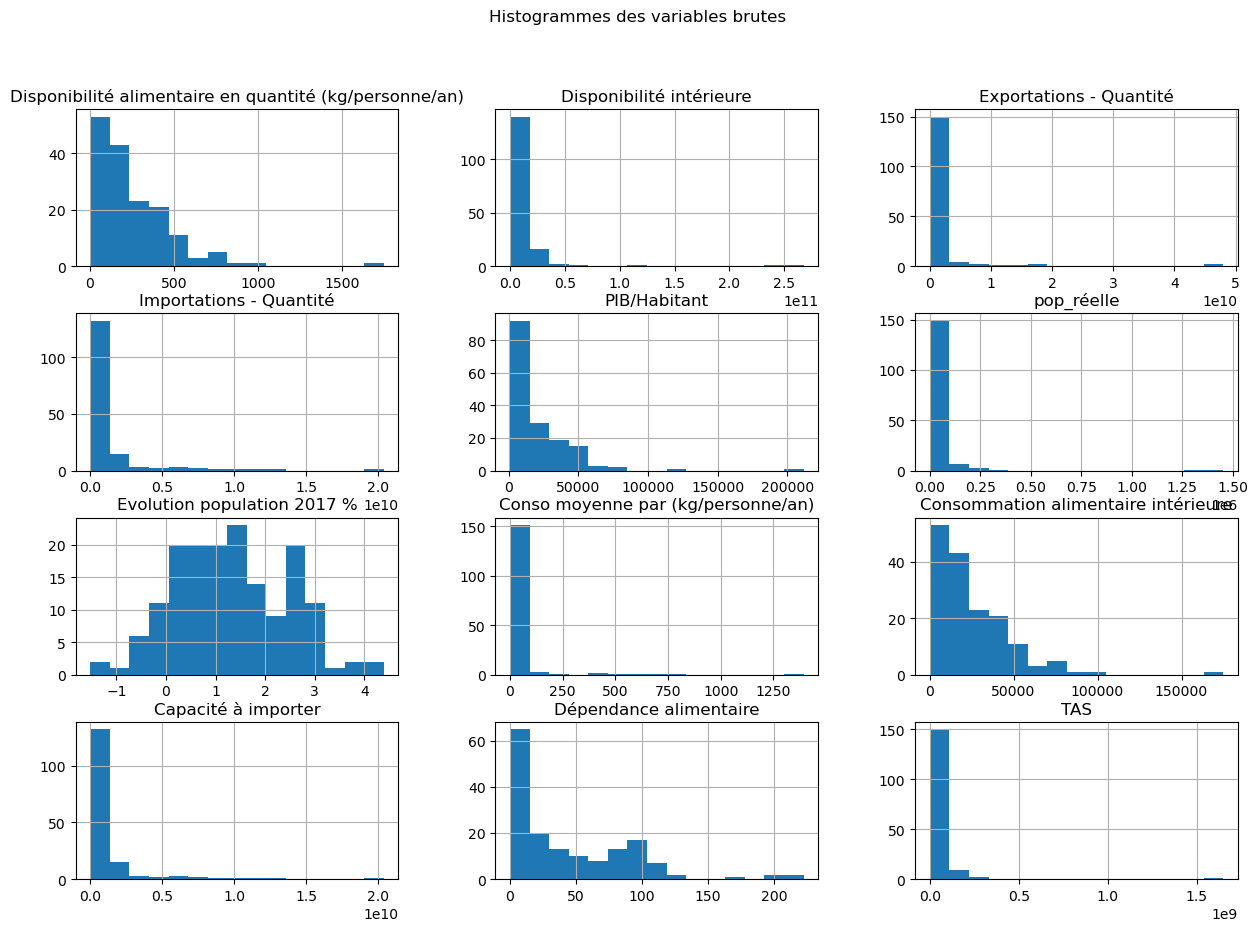

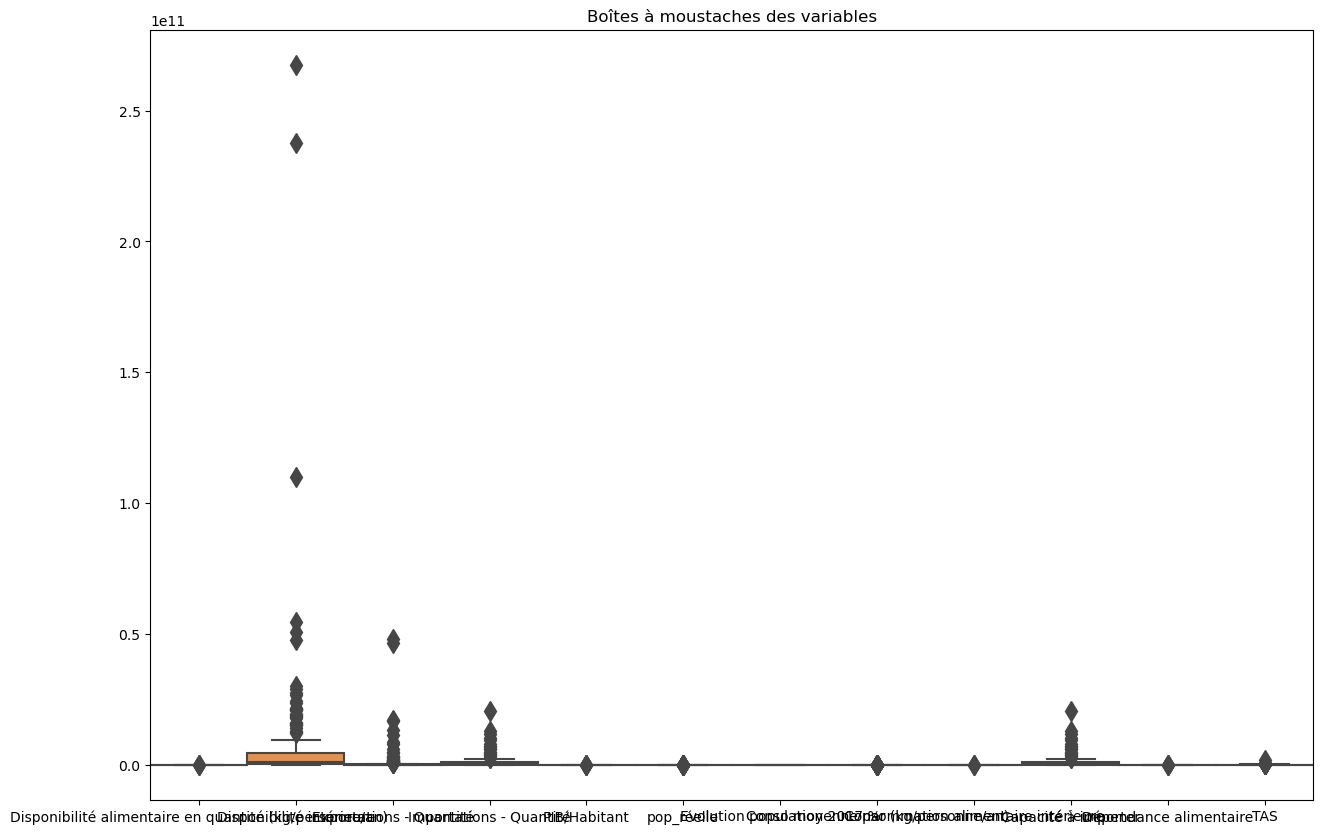

In [481]:
# Test des graphs
df_poulet.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histogrammes des variables brutes')
plt.show()

# Boîtes à moustaches
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_poulet, width=1, fliersize=10)
plt.title('Boîtes à moustaches des variables')
plt.show()

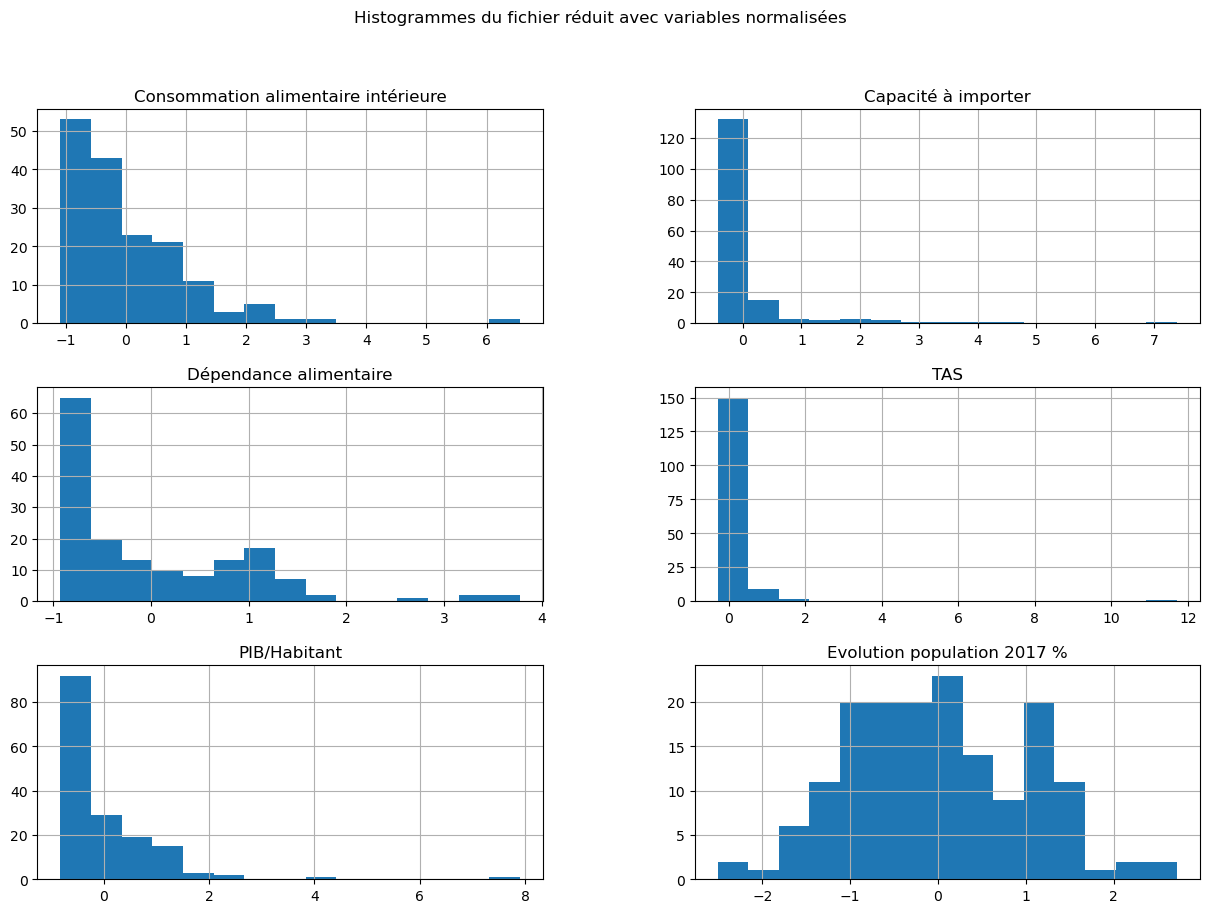

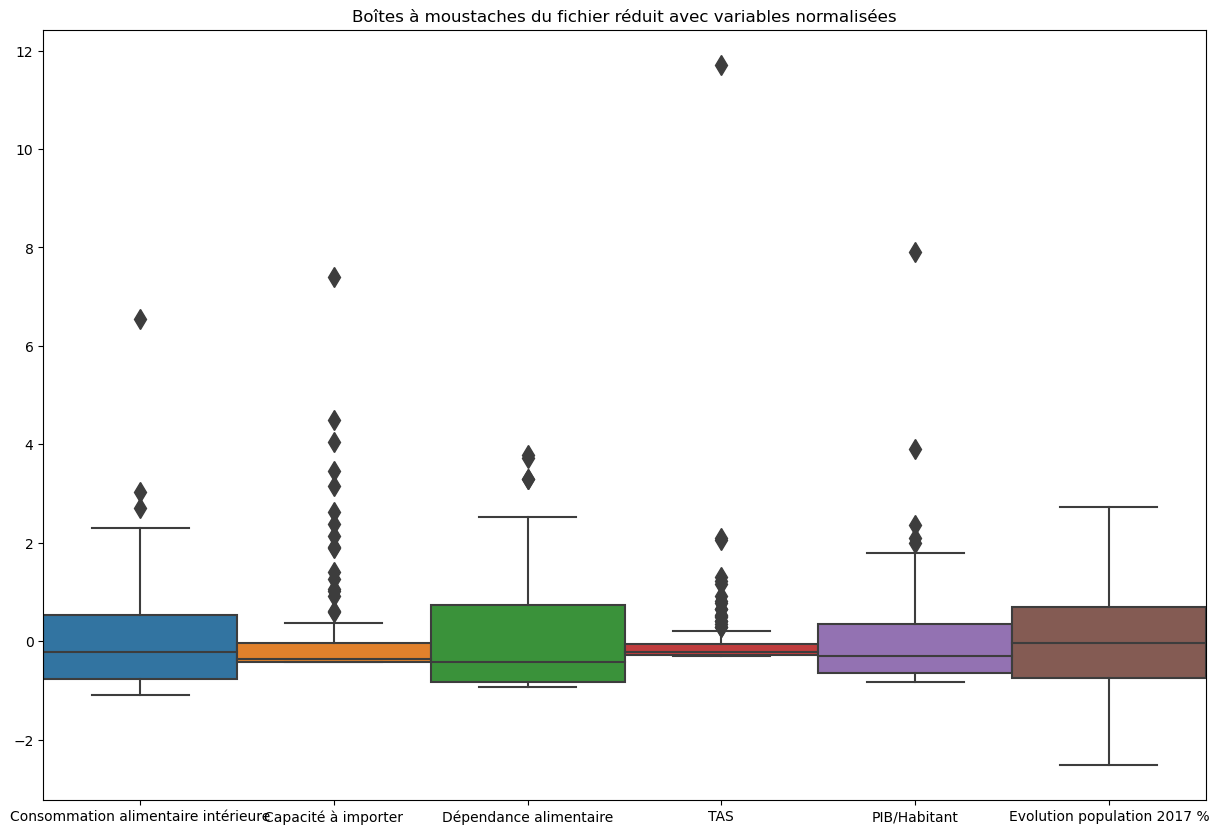

In [482]:
# Test des graphs
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histogrammes du fichier réduit avec variables normalisées')
plt.show()

# Boîtes à moustaches
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, width=1, fliersize=10)
plt.title('Boîtes à moustaches du fichier réduit avec variables normalisées')
plt.show()

In [483]:
from scipy import stats
threshold = 3  # Définir le seuil pour considérer une valeur comme aberrante

# Calculer les z-scores pour chaque colonne
z_scores = ((df - df.mean()) / df.std()).abs()

# Identifier les lignes contenant au moins une valeur z-score supérieure au seuil
outliers = z_scores.max(axis=1) > threshold

# Afficher les lignes avec des valeurs aberrantes
aberrant_rows = df[outliers]
print(aberrant_rows)



                                                    Consommation alimentaire intérieure  \
Zone                                                                                      
Allemagne                                                                     -0.073380   
Belgique                                                                      -0.376082   
Chine                                                                          6.555647   
Gambie                                                                        -0.941104   
Inde                                                                          -0.969279   
Israël                                                                         3.032033   
Japon                                                                         -0.124304   
Luxembourg                                                                    -0.213422   
Mexique                                                                        0.611734   

In [484]:
# Z-Scores pour voir le nombre de valeurs aberantes
z_scores = st.zscore(df)
(np.abs(z_scores) > 3).sum()

# Test de Shapiro-Wilk pour la normalité (0.05)
for col in df.columns:
    _, p_value = st.shapiro(df[col])
    print(f"Shapiro-Wilk test p-value for {col}: {p_value}")

Shapiro-Wilk test p-value for Consommation alimentaire intérieure: 1.056611287179876e-12
Shapiro-Wilk test p-value for Capacité à importer: 4.7514170221002435e-22
Shapiro-Wilk test p-value for Dépendance alimentaire: 1.0
Shapiro-Wilk test p-value for TAS: 1.9026020948246861e-25
Shapiro-Wilk test p-value for PIB/Habitant: 3.863992251806707e-17
Shapiro-Wilk test p-value for Evolution population 2017 %: 0.24595801532268524


#On enleve les outliers : États-Unis d'Amérique, Chine,Fédération de Russie, Inde, Brésil et Mexique.
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df
list_outlier = ["États-Unis d'Amérique","Chine","Brésil","Fédération de Russie","Mexique", 'France','Inde']
data_cleaned = remove(df, list_outlier)

In [486]:
missing_values = df.isna().sum()
print(missing_values)


Consommation alimentaire intérieure    0
Capacité à importer                    0
Dépendance alimentaire                 2
TAS                                    0
PIB/Habitant                           0
Evolution population 2017 %            0
dtype: int64


In [487]:
missing_rows = df[df.isna().any(axis=1)]
print(missing_rows)


                                       Consommation alimentaire intérieure  \
Zone                                                                         
Ouzbékistan                                                      -1.061240   
République démocratique populaire lao                            -0.904617   

                                       Capacité à importer  \
Zone                                                         
Ouzbékistan                                      -0.428085   
République démocratique populaire lao            -0.428086   

                                       Dépendance alimentaire       TAS  \
Zone                                                                      
Ouzbékistan                                               NaN -0.291348   
République démocratique populaire lao                     NaN -0.291348   

                                       PIB/Habitant  \
Zone                                                  
Ouzbékistan                

In [488]:
# Supprimer les lignes correspondant aux index des pays spécifiés
df = df.drop(['Ouzbékistan', 'République démocratique populaire lao'], axis=0)
df


,Consommation alimentaire intérieure,Capacité à importer,Dépendance alimentaire,TAS,PIB/Habitant,Evolution population 2017 %
Zone,,,,,,
Afghanistan,-1.021909,-0.305640,0.148850,-0.020172,-0.771441,1.119145
Afrique du Sud,0.934298,2.136724,-0.414098,0.140615,-0.280517,0.100036
Albanie,-0.308227,-0.267646,0.782986,-0.270437,-0.329363,-1.230185
Algérie,-0.732682,-0.418108,-0.912248,0.024680,-0.369182,0.664550
Allemagne,-0.073380,3.450237,0.096836,0.358783,1.339597,-0.661303
...,...,...,...,...,...,...
Émirats arabes unis,0.996422,1.400132,1.295941,-0.222360,2.089621,0.030548
Équateur,0.002700,-0.428094,-0.927523,-0.162808,-0.374569,0.415630
États-Unis d'Amérique,2.071211,0.185650,-0.913277,2.096527,1.622997,-0.594907


# Partie 5: Analyse en Composantes Principales

In [489]:
# ACP
pca = PCA(svd_solver='full')
coord = pca.fit_transform(df)

In [490]:
# Nombre de composantes principales de l'ACP (pas encore déf)
print("Nombre de composantes principales:", pca.n_components_)

Nombre de composantes principales: 6


In [491]:
# Les proportions variances expliquées 
print("Proportion de variance expliquée:", pca.explained_variance_ratio_)

Proportion de variance expliquée: [0.35306209 0.20078469 0.17202642 0.13186916 0.08381558 0.05844206]


In [492]:
# Variance cumulative expliquée en pourcentage
cumulative_variance_ratio_percentage = np.cumsum(pca.explained_variance_ratio_) * 100
#Valeurs propres 
eigenvalues = pca.explained_variance_


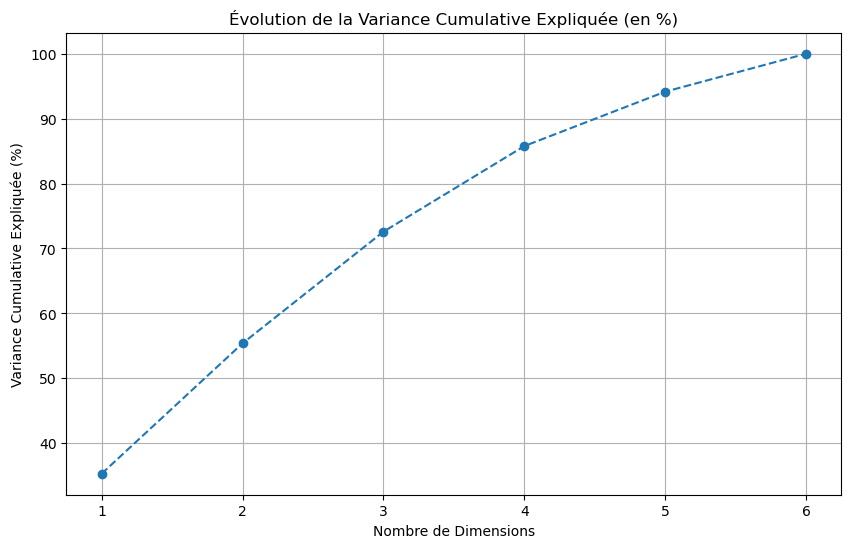

In [493]:
# Tracer l'évolution de la variance cumulative
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio_percentage) + 1), cumulative_variance_ratio_percentage, marker='o', linestyle='--')
plt.title('Évolution de la Variance Cumulative Expliquée (en %)')
plt.xlabel('Nombre de Dimensions')
plt.ylabel('Variance Cumulative Expliquée (%)')
plt.grid(True)
plt.show()

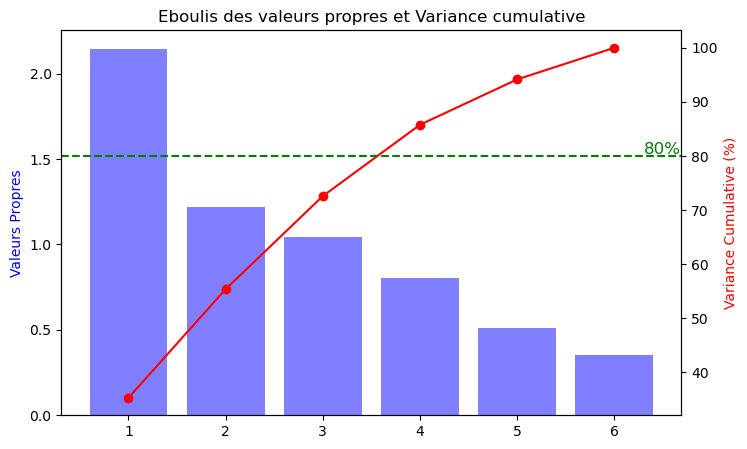

In [494]:
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar plot des valeurs propres
ax1.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.5, align='center', color='blue')
ax1.set_ylabel('Valeurs Propres', color='blue')

# Créer un deuxième axe y pour la variance cumulative
ax2 = ax1.twinx()
ax2.plot(range(1, len(eigenvalues) + 1), cumulative_variance_ratio_percentage, marker='o', color='red')
ax2.set_ylabel('Variance Cumulative (%)', color='red')

# Ligne en pointillés pour marquer 80% de la variance expliquée
ax2.axhline(y=80, color='green', linestyle='--')
ax2.text(len(eigenvalues) + 0.3, 80.3, "80%", fontsize=12, color='green')

# Titre et labels
plt.title('Eboulis des valeurs propres et Variance cumulative')
plt.xlabel('Composantes principales')

plt.show()


In [495]:
# pca définir les composantes principales
pca = PCA(n_components=4).fit(df) # Je choisis la composante apres 80 % 
eigval = pca.explained_variance_  # les valeurs propres de l'ACP


In [496]:
# Nombre de composantes / variables
p = len(eigval)

# Calcul des seuils pour le test des bâtons brisés
bs = 1/np.arange(p, 0, -1)
bs = np.cumsum(bs)
bs = bs[::-1] / bs[-1]  # Normalisation pour correspondre à la somme des valeurs propres

# Affichage des valeurs propres et des seuils dans un DataFrame pour comparaison
resultats_batons_brises = pd.DataFrame({'Val.Propre': eigval, 'Seuils': bs[:len(eigval)]})

print(resultats_batons_brises)#Val propre superieure au seuil

   Val.Propre  Seuils
0    2.146569    1.00
1    1.220744    0.52
2    1.045897    0.28
3    0.801747    0.12


# A.Projections

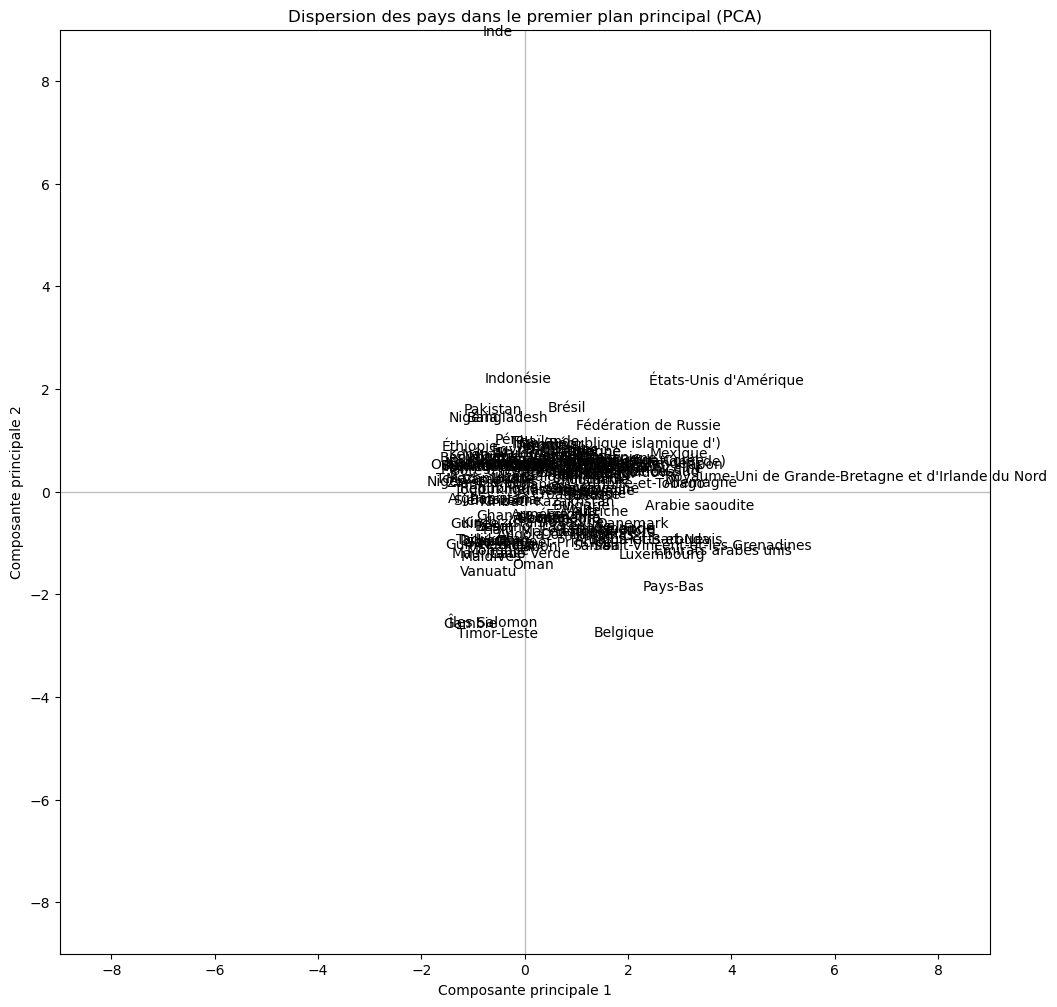

In [497]:
# Positionnement des pays dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-9,9) # même limites en abscisse
axes.set_ylim(-9,9) # et en ordonnée

# Placement des étiquettes des observations (pays)
for i in range(len(df)):
    plt.annotate(df.index[i], (coord[i,0], coord[i,1]))

# Ajouter les axes
plt.plot([-9,9], [0,0], color='silver', linestyle='-', linewidth=1)
plt.plot([0,0], [-9,9], color='silver', linestyle='-', linewidth=1)

# Ajouter un titre
plt.title("Dispersion des pays dans le premier plan principal (PCA)")

# Ajouter une légende pour expliquer les axes
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")

# Afficher
plt.show()


## B. Contribution des pays dans l'inertie totale

In [498]:
# Calcul des carrés des distances des pays au centre de gravité
di = np.sum(coord**2, axis=1)
# Tri et affichage des contributions les plus élevées dans un df
contributions_df = pd.DataFrame({'Pays': df.index, 'd_i': di}).sort_values(by='d_i', ascending=False).head(10)
contributions_df

,Pays,d_i
31,Chine,163.759299
62,Inde,139.525136
71,Japon,23.125868
16,Belgique,17.948480
83,Luxembourg,17.474790
94,Mexique,17.342410
142,Timor-Leste,15.851658
111,Pays-Bas,14.939108
50,Gambie,14.919898
4,Allemagne,14.218705


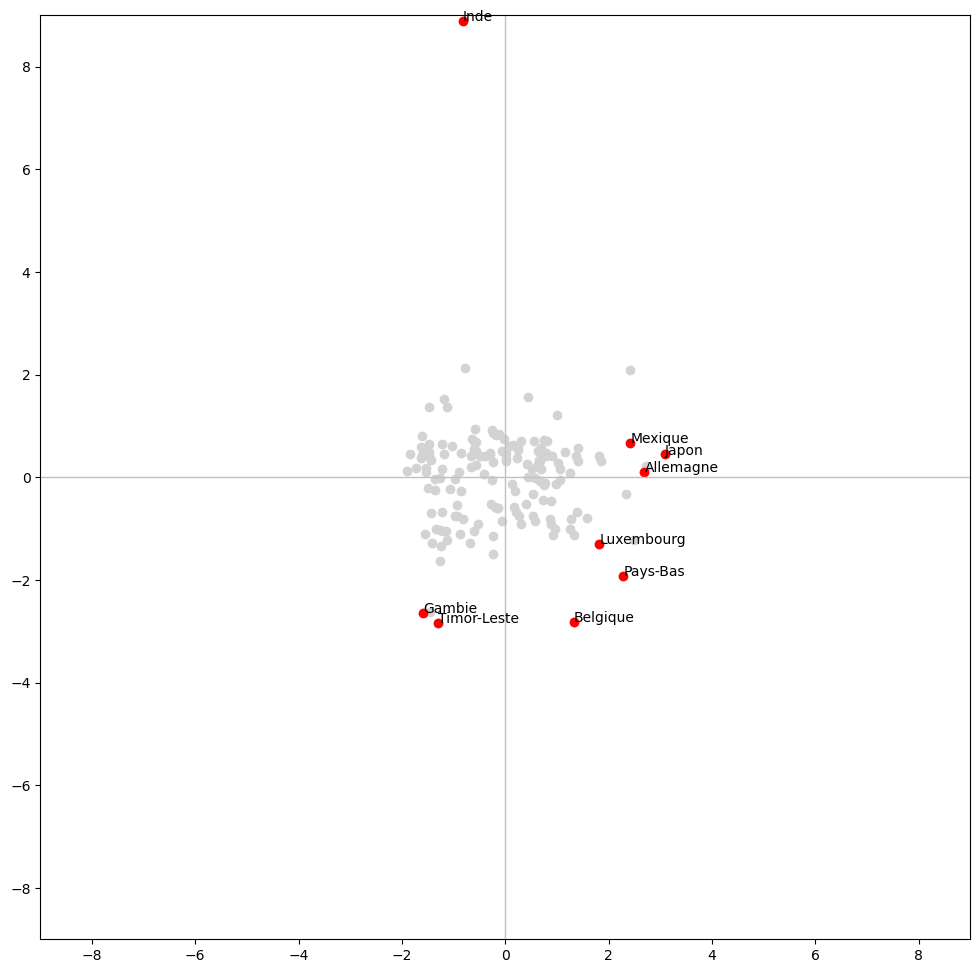

In [499]:
# Tri des contributions les plus élevées
top_contributions = contributions_df.sort_values(by='d_i', ascending=False)
# Sélection des 10 plus grandes contributions
top_10_contributions = top_contributions.head(10)

# Positionnement des pays dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-9,9) 
axes.set_ylim(-9,9) 

# Utilisation de scatter pour placer tous les points
plt.scatter(coord[:, 0], coord[:, 1], color='lightgray')

# Mise en évidence des 10 plus grandes contributions
top_10_indices = df.index[df.index.isin(top_10_contributions['Pays'])]  # Trouver les noms des pays correspondant aux 10 plus grandes contributions
top_10_indices_int = [df.index.get_loc(country) for country in top_10_indices]  # Obtenir les indices entiers correspondants
plt.scatter(coord[top_10_indices_int, 0], coord[top_10_indices_int, 1], color='red')

# Annoter uniquement les 10 plus grands contributeurs
for country in top_10_contributions['Pays']:
    idx = df.index.get_loc(country)
    plt.annotate(country, (coord[idx, 0], coord[idx, 1]), color='black')

# Ajouter les axes
plt.plot([-9,9], [0,0], color='silver', linestyle='-', linewidth=1)
plt.plot([0,0], [-9,9], color='silver', linestyle='-', linewidth=1)

# Affichage
plt.show()

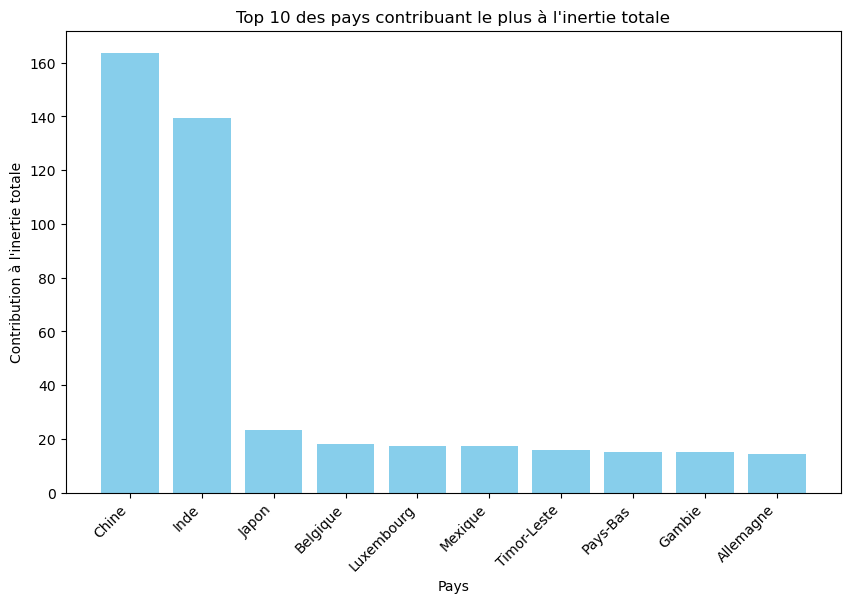

In [500]:
# Création du graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(top_10_contributions['Pays'], top_10_contributions['d_i'], color='skyblue')
plt.xlabel('Pays')
plt.ylabel("Contribution à l'inertie totale")
plt.title('Top 10 des pays contribuant le plus à l\'inertie totale')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.show()

## C.Quantifier l'importance de chaque composante 

In [501]:
# Préparation des données pour le calcul de COS2
cos2 = coord ** 2  # carré des coordonnées pour chaque individu
# Division par di pour obtenir COS2
di_reshape = di.reshape(-1, 1) 
cos2 = cos2 / di_reshape

# Création d'un DataFrame pour les COS2
cos2_df = pd.DataFrame({'Pays':df.index})
for j in range(p):
    cos2_df[f'COS2_{j+1}'] = cos2[:, j]  # Ajout des COS2 pour chaque axe

print(cos2_df)

                      Pays    COS2_1    COS2_2    COS2_3    COS2_4
0              Afghanistan  0.730671  0.013629  0.238650  0.010456
1           Afrique du Sud  0.346404  0.018610  0.126014  0.023580
2                  Albanie  0.016983  0.131859  0.421355  0.370276
3                  Algérie  0.493295  0.173518  0.031732  0.246335
4                Allemagne  0.510974  0.000696  0.118059  0.019728
..                     ...       ...       ...       ...       ...
155    Émirats arabes unis  0.696722  0.164781  0.078514  0.020527
156               Équateur  0.233417  0.191929  0.009963  0.542960
157  États-Unis d'Amérique  0.465394  0.348218  0.000023  0.014911
158               Éthiopie  0.595814  0.145733  0.186305  0.062395
159           Îles Salomon  0.153609  0.492367  0.126917  0.200608

[160 rows x 5 columns]


In [502]:
#vérifions la théorie ou la somme en ligne des cos2 = 1
print(np.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [503]:
# Calcul des contributions aux axes pour toutes les composantes principales
ctr = coord ** 2  # Calcul des carrés des coordonnées des individus sur chaque axe
for j in range(p):
    ctr[:, j] = ctr[:, j] / (n * eigenvalues[j])  # Normalisation des carrés des coordonnées

# Création d'un DataFrame pandas pour afficher les contributions aux axes
contributions_df = pd.DataFrame({'Pays': df.index})
for j in range(p):
    contributions_df[f'CTR_{j+1}'] = ctr[:, j]  # Ajout des contributions pour chaque axe
contributions_df


,Pays,CTR_1,CTR_2,CTR_3,CTR_4
0,Afghanistan,0.006419,0.000211,0.004303,0.000246
1,Afrique du Sud,0.005655,0.000534,0.004222,0.001031
2,Albanie,0.000121,0.001656,0.006177,0.007082
3,Algérie,0.003056,0.001890,0.000403,0.004086
4,Allemagne,0.020893,0.000050,0.009907,0.002160
...,...,...,...,...,...
155,Émirats arabes unis,0.017997,0.007485,0.004162,0.001420
156,Équateur,0.000938,0.001356,0.000082,0.005840
157,États-Unis d'Amérique,0.016658,0.021917,0.000002,0.001429
158,Éthiopie,0.007465,0.003211,0.004791,0.002093


In [504]:
# Racine carrée des valeurs propres pour chaque composantes
sqrt_eigval = np.sqrt(eigval)
sqrt_eigval 

array([1.46511754, 1.10487265, 1.02269117, 0.895403  ])

In [505]:
# Calculer les contributions des variables aux composantes principales
contributions_variables = pca.components_ * sqrt_eigval.reshape(-1, 1)
contributions_variables


array([[ 0.81206714,  0.74862709,  0.00221674,  0.03270617,  0.88319993,
        -0.38151949],
       [-0.00545437, -0.03062006, -0.77844577,  0.77065762, -0.05220239,
        -0.13099677],
       [-0.15620382,  0.45966095,  0.18252447,  0.34462491,  0.08909984,
         0.80634305],
       [-0.15877743,  0.00791254,  0.58953802,  0.52542806, -0.04919352,
        -0.38784522]])

## D. Interpréter les composantes principales

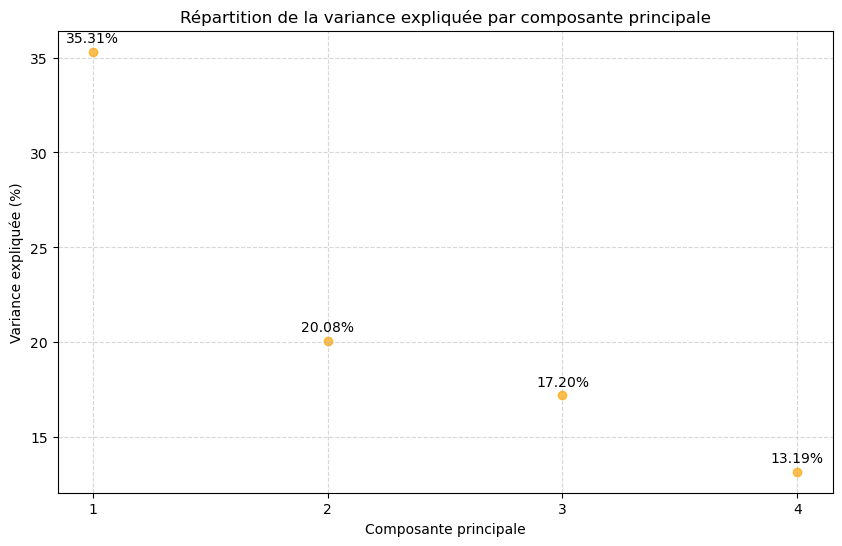

In [506]:
# Calculer le pourcentage de variance expliquée par chaque composante principale
explained_variance_ratio_percentage = pca.explained_variance_ratio_ * 100

# Créer un graphique en nuage de points avec annotations
plt.figure(figsize=(10, 6))
plt.scatter(range(1, len(explained_variance_ratio_percentage) + 1), explained_variance_ratio_percentage, color='orange', alpha=0.7)

# Ajouter des annotations pour indiquer le pourcentage de variance expliquée
for i, (x, y) in enumerate(zip(range(1, len(explained_variance_ratio_percentage) + 1), explained_variance_ratio_percentage)):
    plt.text(x, y + 0.5, f'{y:.2f}%', ha='center')

plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée (%)')
plt.title('Répartition de la variance expliquée par composante principale')
plt.xticks(range(1, len(explained_variance_ratio_percentage) + 1))
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()



In [508]:
# Interprétation des composantes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=['PC{}'.format(i) for i in range(1, pca.n_components_ + 1)], index=df.columns)

loading_matrix

,PC1,PC2,PC3,PC4
Consommation alimentaire intérieure,0.812067,-0.005454,-0.156204,-0.158777
Capacité à importer,0.748627,-0.030620,0.459661,0.007913
Dépendance alimentaire,0.002217,-0.778446,0.182524,0.589538
TAS,0.032706,0.770658,0.344625,0.525428
PIB/Habitant,0.883200,-0.052202,0.089100,-0.049194
Evolution population 2017 %,-0.381519,-0.130997,0.806343,-0.387845


PC1: pays ayant une forte consommation alimentaire intérieure et un PIB par habitant élevé étant positionnés plus positivement sur cette composante.
PC2: TAS élevée et autres indicateurs trop faibles pour les cibler.
PC3: Pays ne consommant que peu de poulet et bonne capacité à importer mais sans de dépendance alimentaire pays evolution population positive.
PC4: Pays ne consommant que peu de poulet pib faible TAS élevé.

In [509]:
# Calculer les scores des composantes principales pour chaque individu
pc_scores = pca.transform(df)

# Créer un DataFrame pour stocker les scores des composantes principales par individu
pc_scores_df = pd.DataFrame(pc_scores, index=df.index, columns=[f'PC{i+1}' for i in range(pc_scores.shape[1])])
pc_scores_df


,PC1,PC2,PC3,PC4
Zone,,,,
Afghanistan,-1.494017,-0.204048,0.853838,-0.178718
Afrique du Sud,1.402267,0.325021,0.845763,-0.365859
Albanie,-0.205397,-0.572315,-1.023067,0.959054
Algérie,-1.030913,0.611422,0.261467,-0.728503
Allemagne,2.695437,0.099505,1.295624,0.529625
...,...,...,...,...
Émirats arabes unis,2.501668,-1.216615,0.839793,0.429402
Équateur,-0.571054,0.517823,-0.117979,-0.870953
États-Unis d'Amérique,2.406831,2.081902,-0.016902,0.430813


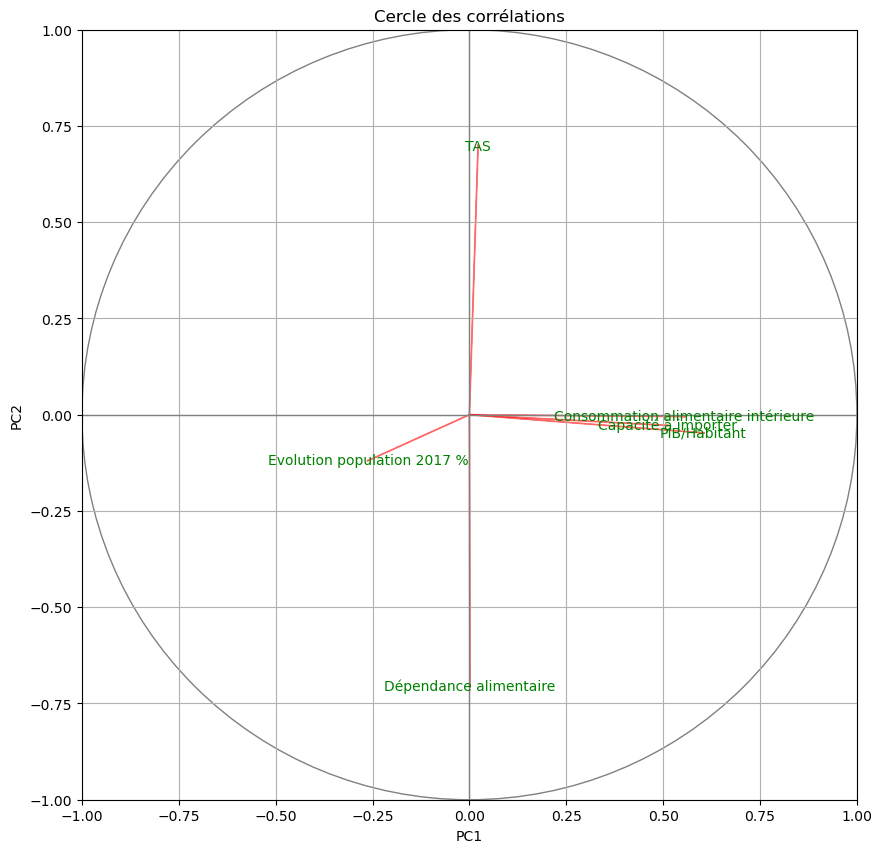

In [510]:
# Création du cercle des corrélations
fig, ax = plt.subplots(figsize=(10, 10))
circle = plt.Circle((0, 0), 1, color='gray', fill=False)
ax.add_artist(circle)

# Ajouter les vecteurs au cercle des corrélations
for i in range(len(df.columns)):
    plt.arrow(0, 0, pca.components_.T[i, 0], pca.components_.T[i, 1], color='r', alpha=0.5)
    plt.text(pca.components_.T[i, 0]*1, pca.components_.T[i, 1]*1, df.columns[i], color='g', ha='center', va='center')

# Définir les limites et les étiquettes du graphique
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle des corrélations')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid()

# Afficher le graphique
plt.show()

In [512]:
# Export des datas avec composantes de ACP
pc_scores_df.to_csv("C:/p9/pc_scores_df.csv", index=False)

In [525]:
# Si nous souhaitons lancer le Clustering sans les outliers fichier à utiliser
data_cleaned.to_csv("C:/p9/data_cleaned.csv")

In [513]:
df.shape

(160, 6)

In [514]:
#Choix de ne pas prendre de PCA pour la suite peu de variable pas de necessité de réduire la dimension
df.to_csv("C:/p9/df.csv")

Compte tenu de la dimensionnalité de mon df je choisis d'effectuer le clustering depuis le df brut L ACP n'est pas judicieuse içi.Passons au clustering : http://localhost:8888/notebooks/Clustering_visualisations.ipynb